In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.datasets import load_boston, make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [2]:
boston = load_boston()
x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

c:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

In [3]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)


In [4]:
x_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0)

In [6]:
svr = SVR(kernel="linear", C=1.0, gamma="auto")
svr.fit(X_train, y_train)

SVR(gamma='auto', kernel='linear')

In [7]:
pred = svr.predict(X_test)

In [8]:
print("가중치: ", svr.coef_ )
print("절편: ", svr.intercept_)

가중치:  [[ -3.74434697   3.185       -1.31745932   2.29085781  -2.39009279
   11.95269302  -1.72573594  -5.37615624   1.06269643  -3.82215159
   -7.12361368   3.91225253 -11.14905687]]
절편:  [23.97548935]


In [9]:
print("평균 잔차 제곱: ", np.mean(np.square(y_test-pred)))

평균 잔차 제곱:  41.169991649325425


In [10]:
mse = mean_squared_error(y_test, pred)
print("평균 잔차 제곱: ", mse)

평균 잔차 제곱:  41.169991649325425


In [11]:
rmse = mean_squared_error(y_test, pred)**0.5
rmse

6.416384624484837

In [12]:
rmse = mean_squared_error(y_test, pred, squared=False)
rmse

6.416384624484837

In [13]:
(svr.score(X_train,y_train), svr.score(X_test,y_test)) # r2 값

(0.6786353156494889, 0.4960772608018382)

In [14]:
svr = SVR(kernel="poly", C=1.0, gamma="auto")
svr.fit(X_train,y_train)

SVR(gamma='auto', kernel='poly')

In [15]:
pred = svr.predict(X_test)

In [16]:
mean_squared_error(y_test, pred), mean_squared_error(y_test,pred, squared=False)


(74.35611698708063, 8.622999303437327)

### 가우시안

In [17]:
# 모델정의, 모델학습, 예측값 저장, mse,rmse
model = SVR(kernel="rbf", C=1.0, gamma="auto")
model.fit(X_train,y_train)

SVR(gamma='auto')

In [18]:
pred = model.predict(X_test)
model.score(X_train,y_train), model.score(X_test,y_test)

(0.4195969411935676, 0.27029457266422663)

In [19]:
mean_squared_error(y_test,pred),mean_squared_error(y_test,pred,squared=False)

(59.61621497312026, 7.721153733291435)

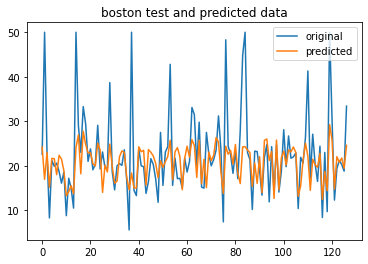

In [20]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.legend()
plt.title("boston test and predicted data")
plt.show()

In [23]:
kernel_list = ["linear", "poly", "rbf"]

for kernel in kernel_list:
    model = SVR(kernel=kernel, C=10000, gamma="auto")
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(kernel)
    print("절편: ", svr.intercept_)
    print("mse: ", mean_squared_error(y_test,pred))
    print("rmse: ", mean_squared_error(y_test,pred,squared=False))
    print(model.score(X_train,y_train), model.score(X_test,y_test))

linear
절편:  [22.4658175]
mse:  34.84336938998157
rmse:  5.9028272370095305
0.7467489133007541 0.5735154309612158
poly
절편:  [22.4658175]
mse:  17.91398592344502
rmse:  4.232491692070407
0.9309379424173628 0.7807319240336149
rbf
절편:  [22.4658175]
mse:  17.937361657950735
rmse:  4.2352522543469275
0.9430510819378366 0.7804458038841812


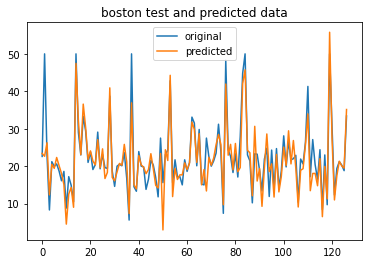

In [24]:
x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, pred, label="predicted")
plt.legend()
plt.title("boston test and predicted data")
plt.show()